<a href="https://colab.research.google.com/github/sandesh-kun/Vton/blob/main/attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install salesforce-lavis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.4/235.4 kB 25.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
import torch
from PIL import Image

from lavis.models import load_model_and_preprocess
from lavis.processors import load_processor

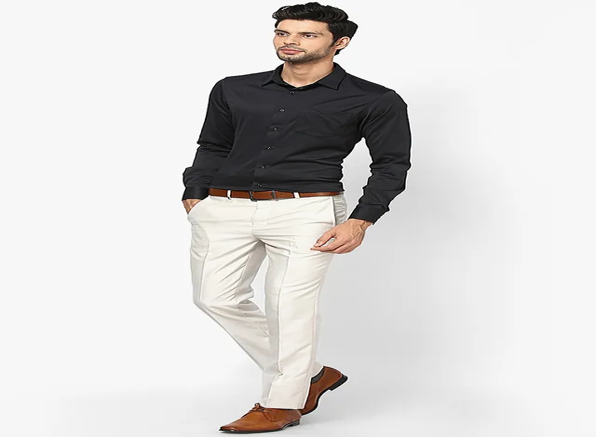

In [ ]:
raw_image = Image.open("messi.jpg").convert("RGB")
display(raw_image.resize((596, 437)))
ww=raw_image

In [ ]:
# setup device to use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
caption = "a man wearing a shirt and a pant"

In [ ]:

# model, vis_processors, text_processors = load_model_and_preprocess("blip_image_text_matching", "base", device=device, is_eval=True)
model, vis_processors, text_processors = load_model_and_preprocess("blip_image_text_matching", "large", device=device, is_eval=True)

100%|██████████| 3.43G/3.43G [00:48<00:00, 76.4MB/s]


In [ ]:
from matplotlib import pyplot as plt
from lavis.common.gradcam import getAttMap
from lavis.models.blip_models.blip_image_text_matching import compute_gradcam
import numpy as np

dst_w = 720
w, h = raw_image.size
scaling_factor = dst_w / w

resized_img = raw_image.resize((int(w * scaling_factor), int(h * scaling_factor)))
norm_img = np.float32(resized_img) / 255

In [ ]:
img = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
txt = text_processors["eval"](caption)

In [ ]:
txt_tokens = model.tokenizer(txt, return_tensors="pt").to(device)
gradcam, _ = compute_gradcam(model, img, txt, txt_tokens, block_num=7)

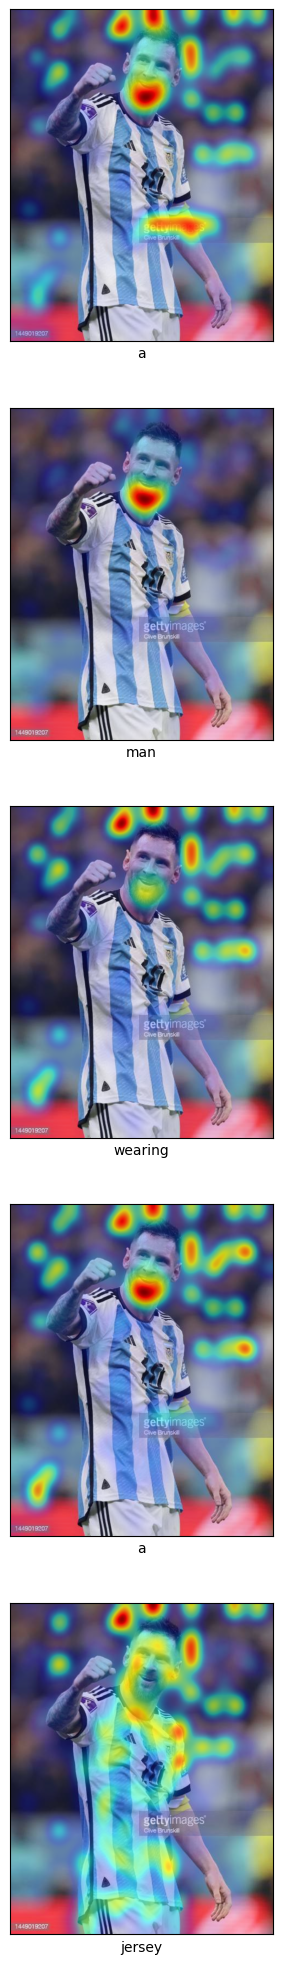

In [ ]:
num_image = len(txt_tokens.input_ids[0]) - 2
fig, ax = plt.subplots(num_image, 1, figsize=(15, 5 * num_image))

gradcam_iter = iter(gradcam[0][2:-1])
token_id_iter = iter(txt_tokens.input_ids[0][1:-1])

for i, (gradcam, token_id) in enumerate(zip(gradcam_iter, token_id_iter)):
    word = model.tokenizer.decode([token_id])
    gradcam_image = getAttMap(norm_img, gradcam, blur=True)
    ax[i].imshow(gradcam_image)
    ax[i].set_yticks([])
    ax[i].set_xticks([])
    ax[i].set_xlabel(word)

{'a': array([[[0.89411026, 0.89411026, 0.94080349],
        [0.89411241, 0.89411241, 0.94080429],
        [0.8941167 , 0.8941167 , 0.94080588],
        ...,
        [0.93389207, 0.93389207, 0.95043201],
        [0.93388474, 0.93388474, 0.9504286 ],
        [0.9338811 , 0.9338811 , 0.95042691]],

       [[0.89410084, 0.89410084, 0.94079999],
        [0.89410287, 0.89410287, 0.94080074],
        [0.89410704, 0.89410704, 0.94080231],
        ...,
        [0.93387371, 0.93387371, 0.9504235 ],
        [0.93386656, 0.93386656, 0.95042018],
        [0.93386298, 0.93386298, 0.95041851]],

       [[0.89408207, 0.89408207, 0.94079296],
        [0.89408398, 0.89408398, 0.94079368],
        [0.89408779, 0.89408779, 0.94079511],
        ...,
        [0.93383694, 0.93383694, 0.95040645],
        [0.93383014, 0.93383014, 0.95040332],
        [0.93382674, 0.93382674, 0.95040174]],

       ...,

       [[0.93955702, 0.93955702, 0.95305615],
        [0.93947661, 0.93947661, 0.95301893],
        [0.93931

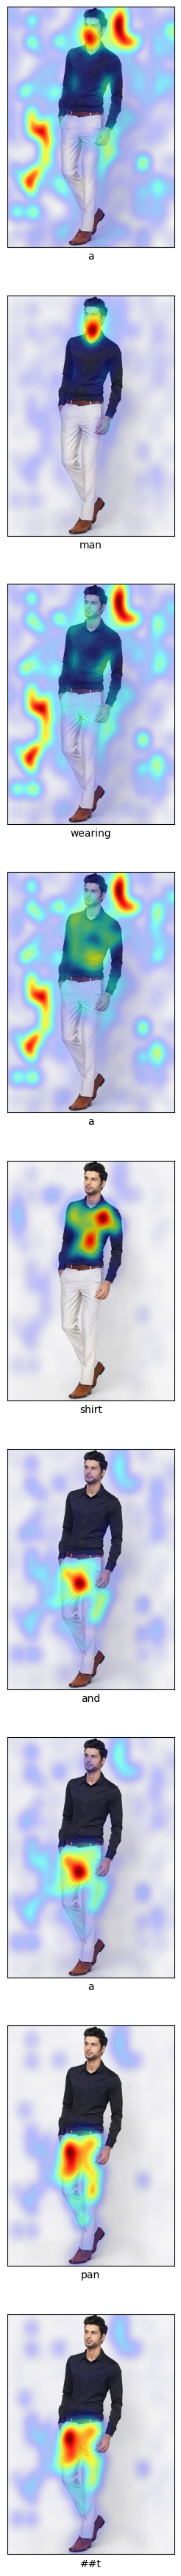

In [ ]:
num_image = len(txt_tokens.input_ids[0]) - 2
fig, ax = plt.subplots(num_image, 1, figsize=(15, 5 * num_image))

gradcam_iter = iter(gradcam[0][2:-1])
token_id_iter = iter(txt_tokens.input_ids[0][1:-1])

# Initialize a dictionary to store the image/caption pairs
image_caption_dict = {}

for i, (gradcam, token_id) in enumerate(zip(gradcam_iter, token_id_iter)):
    word = model.tokenizer.decode([token_id])
    gradcam_image = getAttMap(norm_img, gradcam, blur=True)
    ax[i].imshow(gradcam_image)
    ax[i].set_yticks([])
    ax[i].set_xticks([])
    ax[i].set_xlabel(word)

    # Add the image/caption pair to the dictionary
    image_caption_dict[word] = gradcam_image

# Use caption as key and image as value
print(image_caption_dict)


In [ ]:
 import spacy

def find_human_noun(sentence):
    # Load the small English model in spaCy
    nlp = spacy.load("en_core_web_sm")

    # Tokenize the sentence and extract the named entities
    doc = nlp(sentence)
    entities = [ent for ent in doc.ents if ent.label_ == "PERSON"]

    # If there are no named entities, extract the lemmas of the nouns
    if not entities:
        nouns = [token.lemma_ for token in doc if token.pos_ == "NOUN"]
    else:
        # Otherwise, use the named entities
        nouns = [ent.text for ent in entities]

    return nouns

# Test the function with an example sentence
sentence = "a man wearing a shirt and a pant"
output = find_human_noun(sentence)
print(output)

['man', 'shirt', 'pant']


In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("A man is wearing a jersey")

human_noun = ""
for token in doc:
    if token.pos_ == "NOUN" and token.dep_ == "nsubj" and token.ent_type_ == "":
        human_noun = token.text

print(human_noun) # Output: man

man


In [ ]:
import spacy

def find_human_noun(sentence):
    # Load the small English model in spaCy
    nlp = spacy.load("en_core_web_sm")

    # Tokenize the sentence and extract the nouns, verbs, and subject/object pairs
    doc = nlp(sentence)
    nouns = [token.text for token in doc if token.pos_ == "NOUN"]
    verbs = [token for token in doc if token.pos_ == "VERB"]
    subject_object_pairs = []
    for verb in verbs:
        if verb.dep_ == "ROOT":
            for child in verb.children:
                if child.dep_ == "nsubj":
                    subject = child
                elif child.dep_ == "dobj":
                    obj = child
            subject_object_pairs.append((subject, obj))

    # Keep only the nouns that are the subject or object of a verb
    human_nouns = []
    for pair in subject_object_pairs:
        for noun in nouns:
            if noun in [pair[0].text, pair[1].text]:
                human_nouns.append(noun)

    return list(set(human_nouns))  # Remove duplicates and return the list of human nouns

# Test the function with an example sentence
sentence = "a man wearing a cap and a jacket"
output = find_human_noun(sentence)
print(output)


[]


In [ ]:
output1=output[0]

IndexError: ignored

In [ ]:
aa=image_caption_dict[output1]

In [ ]:
aa

array([[[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       ...,

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]]

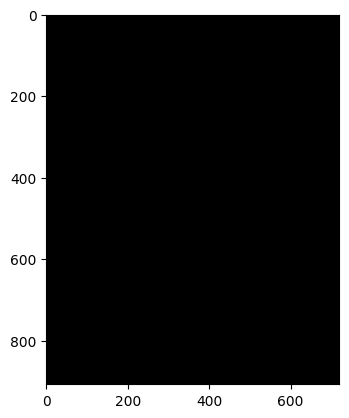

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Assuming `image_array` is your numpy image array
aa_normalized = (aa - aa.min()) * (255 / (aa.max() - aa.min()))  # normalize pixel values

image = Image.fromarray(np.uint8(aa_normalized)).convert("RGB")
plt.imshow(image)
plt.show()


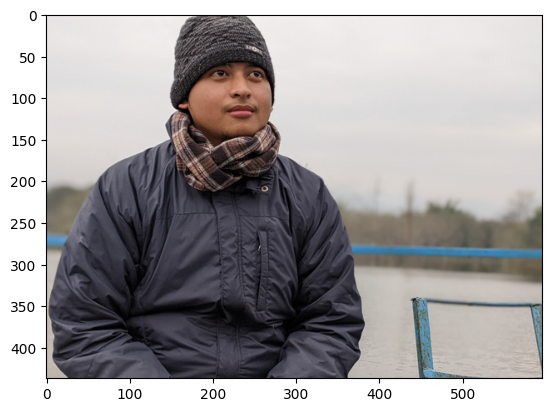

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image as a numpy array
raw_image = Image.open("sam.jpg").convert("RGB")
image_array=raw_image.resize((596, 437))
image_array=np.array(image_array)
# Normalize the pixel values
image_normalized = (image_array - image_array.min()) * (255 / (image_array.max() - image_array.min()))

# Convert the numpy array to a PIL Image object
image_pil = Image.fromarray(np.uint8(image_normalized)).convert('RGB')

# Crop the image to the desired size
x = 0
y = 0
width = 800
height = 600
cropped_image = image_pil.crop((x, y, x+width, y+height))

# Display the cropped image using matplotlib
plt.imshow(image_pil)
plt.show()


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import cv2
# Load the original image
img =Image.open("messi.jpg").convert("RGB")
img.resize((596, 437))

# Load the attention heat map
attention_map = image
attention_map.resize((596,437))

# # Resize the attention map to match the size of the original image
# attention_map = cv2.resize(attention_map, (img.shape[1], img.shape[0]))

# Compute the 50th percentile of the attention map
threshold = np.percentile(attention_map, 50)

# Normalize the attention map between 0 and 1
attention_map = cv2.normalize(attention_map, None, 0, 1, cv2.NORM_MINMAX)

# Convert the attention map to a color map
attention_map = cv2.applyColorMap(np.uint8(255 * attention_map), cv2.COLORMAP_VIRIDIS)

# Set the color of the pixels with values below the threshold to zero
attention_map[attention_map < threshold] = 0

# Create a visual explanation map by overlaying the attention map on the original image
visual_map = cv2.addWeighted(img, 0.5, attention_map, 0.5, 0)

plt.imshow(visual_map)
plt.show()

TypeError: ignored

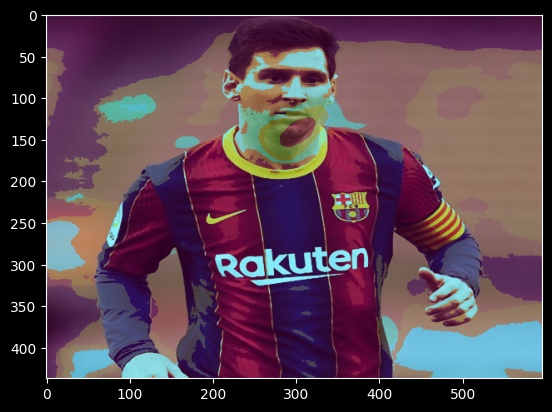

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the original image
img = Image.open("messi.jpg").convert("RGB")
img = img.resize((596, 437)) # resize the image

attention_map=image
# # Load the attention heat map
# aa_normalized = (np.array(img) - np.array(img).min()) * (255 / (np.array(img).max() - np.array(img).min()))  # normalize pixel values
# attention_map = np.uint8(aa_normalized)
attention_map = cv2.resize(np.array(attention_map), (596, 437)) # resize the attention map

# Compute the 50th percentile of the attention map
threshold = np.percentile(attention_map, 10)

# Normalize the attention map between 0 and 1
attention_map = cv2.normalize(attention_map, None, 0, 1, cv2.NORM_MINMAX)

# Convert the attention map to a color map
attention_map = cv2.applyColorMap(np.uint8(255 * attention_map), cv2.COLORMAP_VIRIDIS)

# Set the color of the pixels with values below the threshold to zero
attention_map[attention_map < threshold] = 0

# Create a visual explanation map by overlaying the attention map on the original image
visual_map = cv2.addWeighted(np.array(img), 0.5, attention_map, 0.5, 0)

plt.imshow(visual_map)
plt.show()


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the original image
img = Image.open("messi.jpg").convert("RGB")
img = img.resize((596, 437)) # resize the image

attention_map=image

# Load the attention heat map
aa_normalized = (np.array(img) - np.array(img).min()) * (255 / (np.array(img).max() - np.array(img).min()))  # normalize pixel values
attention_map = np.uint8(aa_normalized)
attention_map = cv2.resize(np.array(attention_map), (596, 437)) # resize the attention map

# Compute the 50th percentile of the attention map
threshold = np.percentile(attention_map, 50)

# Threshold the attention map to create a binary mask
mask = attention_map > threshold

# Create a black image with the same size as the attention map
black = np.zeros((img.height, img.width, 3), dtype=np.uint8)

# Reshape the binary mask to the original shape
mask_3ch = np.reshape(mask[..., np.newaxis], (img.height, img.width, 1))

# Flatten the binary mask and use it to set the pixels in the black image outside of the mask to white
black[np.reshape(~mask, (-1,))] = [255, 255, 255]

# Create a visual explanation map by superimposing the attention map on the original image
visual_map = cv2.addWeighted(np.array(img), 0.5, attention_map, 0.5, 0)

# Superimpose the binary mask on the visual explanation map
visual_map = cv2.addWeighted(visual_map, 1, black, 0.5, 0)

plt.imshow(visual_map)
plt.show()


FileNotFoundError: ignored

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the Grad-CAM image and convert it to grayscale
gradcam = np.array(image)
gray = cv2.cvtColor(gradcam, cv2.COLOR_BGR2GRAY)

# Find the maximum value in the grayscale image
max_val = np.max(gray)

# Find the location of the maximum value
row, col = np.where(gray == max_val)

# Get the bounding box of the area with the highest color value
x1, y1, x2, y2 = col[0], row[0], col[-1], row[-1]
bbox = [x1, y1, x2 - x1, y2 - y1]

# Create a black image of the same size as the Grad-CAM image
mask = np.zeros_like(gradcam)

# Draw a white rectangle around the area with the highest color value
cv2.rectangle(mask, (x1, y1), (x2, y2), (255, 255, 255), -1)

org=Image.open("messi.jpg").convert("RGB")
# Apply the mask to the Grad-CAM image
# result = cv2.bitwise_and(np.array(org), mask)

plt.imshow(mask)
plt.show()


FileNotFoundError: ignored

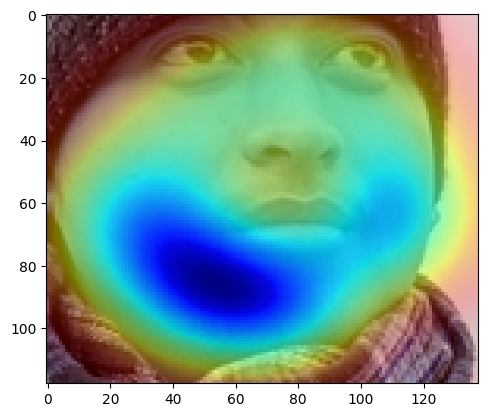

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the Grad-CAM image and convert it to HSV color space
gradcam = np.array(image)
hsv = cv2.cvtColor(gradcam, cv2.COLOR_BGR2HSV)

# Define the lower and upper bounds of the yellow color in HSV
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

# Create a mask of the yellow color in the image
mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

# Find the contours in the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get the bounding box of the largest contour
if len(contours) > 0:
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    largest_contour = max(contour_sizes, key=lambda x: x[0])[1]
    x, y, w, h = cv2.boundingRect(largest_contour)
    bbox = [x, y, w, h]

    # # Create a binary mask for the rectangular region
    # mask = np.zeros_like(gray)
    # mask[y1:y2, x1:x2] = 1

# # Display the result
# plt.imshow(mask, cmap='gray')
# plt.show()

    # Draw a rectangle around the yellow portion of the image
    # cv2.rectangle(gradcam, (x, y - 200), (x + w, y + h - 200), (0, 0, 255), 2)
    # cv2.rectangle(gradcam, (x - 200, y - 400), (x + w + 200, y + h + 200), (0, 0, 255), 2)
    # img1 = Image.open("sam.jpg").convert("RGB")
    # crop_img =img1.crop((0,0, x + 200, y +200))
    img1 = cv2.imread('sam.jpg')

    img_array = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
    cropped_img = img_array[y:y+h, x:x+w]


    # Display the result
    plt.imshow(cropped_img)
    plt.show()
else:
    print('No yellow color found in the image.')


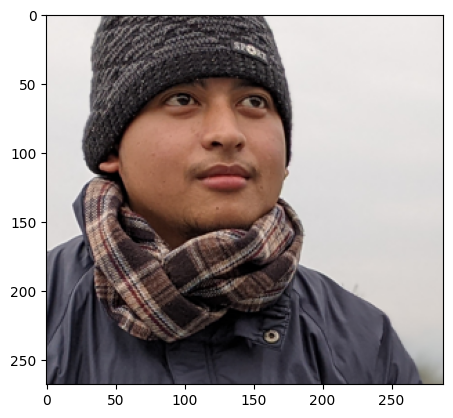

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the Grad-CAM image and convert it to HSV color space
gradcam = np.array(image)
hsv = cv2.cvtColor(gradcam, cv2.COLOR_BGR2HSV)

# Define the lower and upper bounds of the yellow color in HSV
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

# Create a mask of the yellow color in the image
mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

# Find the contours in the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get the bounding box of the largest contour
if len(contours) > 0:
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    largest_contour = max(contour_sizes, key=lambda x: x[0])[1]
    x, y, w, h = cv2.boundingRect(largest_contour)
    bbox = [x, y, w, h]

    # # Create a binary mask for the rectangular region
    # mask = np.zeros_like(gray)
    # mask[y1:y2, x1:x2] = 1

# # Display the result
# plt.imshow(mask, cmap='gray')
# plt.show()

    # Draw a rectangle around the yellow portion of the image
    # cv2.rectangle(gradcam, (x, y - 200), (x + w, y + h - 200), (0, 0, 255), 2)
    # cv2.rectangle(gradcam, (x - 200, y - 400), (x + w + 200, y + h + 200), (0, 0, 255), 2)
    # img1 = Image.open("sam.jpg").convert("RGB")
    # crop_img =img1.crop((0,0, x + 200, y +200))
    img1 = cv2.imread('sam.jpg')

    img_array = np.array(norm_img)
    cropped_img = img_array[y-50:y+h+100, x-50:x+w+100]


    # Display the result
    plt.imshow(cropped_img)
    plt.show()
    # display(Image.fromarray(cropped_img))
else:
    print('No yellow color found in the image.')


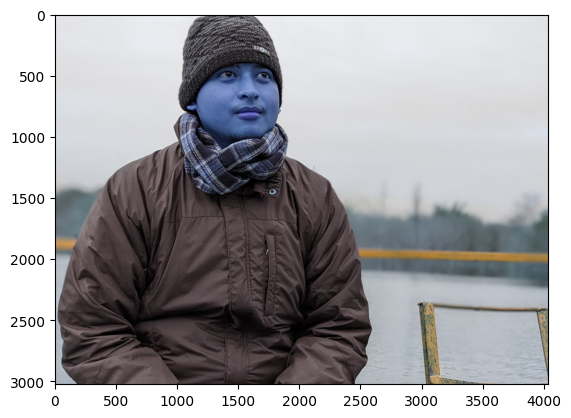

In [ ]:
img = cv2.imread('sam.jpg')
plt.imshow(img)
plt.show()

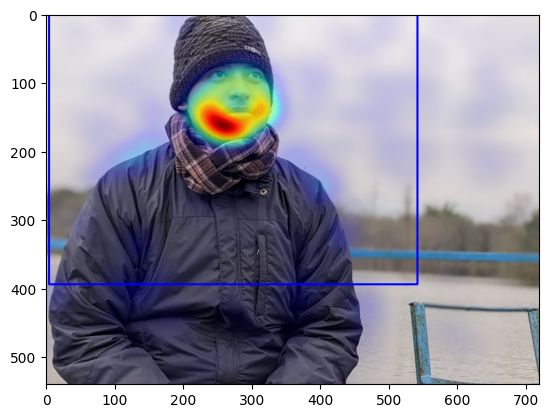

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the Grad-CAM image and convert it to HSV color space
gradcam = np.array(image)
gray = cv2.cvtColor(gradcam, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(gradcam, cv2.COLOR_BGR2HSV)

# Define the lower and upper bounds of the yellow color in HSV
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

# Create a mask of the yellow color in the image
mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

# Find the contours in the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get the bounding box of the largest contour
if len(contours) > 0:
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    largest_contour = max(contour_sizes, key=lambda x: x[0])[1]
    x, y, w, h = cv2.boundingRect(largest_contour)
    bbox = [x, y, w, h]

    left = x
    top = y
    right = x + w
    bottom = y + h

    # Draw a rectangle around the yellow portion of the image
    cv2.rectangle(gradcam, (x - 200, y - 400), (x + w + 200, y + h + 200), (0, 0, 255), 2)

# Read the input image
img = Image.open("sam.jpg").convert("RGB")

# Crop the image using the rectangular coordinates
cropped_img = img.crop((left, top, right, bottom))

# Display only the cropped region of the image
cropped_array = np.array(cropped_img)
plt.imshow(gradcam)
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = gradcam

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Find the contours in the edge image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through the contours and find the contour with the largest area
largest_contour = None
largest_area = 0
for contour in contours:
    area = cv2.contourArea(contour)
    if area > largest_area:
        largest_area = area
        largest_contour = contour

# Approximate the contour using cv2.approxPolyDP()
epsilon = 0.1 * cv2.arcLength(largest_contour, True)
approx = cv2.approxPolyDP(largest_contour, epsilon, True)

# If the polygon has four vertices, crop the rectangular region
len(approx) == 4:
 x, y, w, h = cv2.boundingRect(approx)
 cropped = img[y:y+h, x:x+w]
 plt.imshow(cropped)
 plt.show()



SyntaxError: ignored

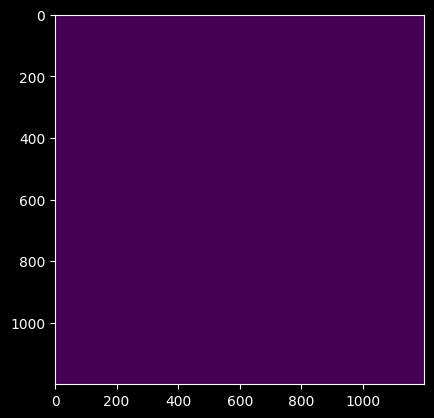

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the Grad-CAM image and convert it to grayscale
gradcam = np.array(image)
gray = cv2.cvtColor(gradcam, cv2.COLOR_BGR2GRAY)

# Find the maximum value in the grayscale image
max_val = np.max(gray)

# Find the location of the maximum value
row, col = np.where(gray == max_val)

# Get the bounding box of the area with the highest color value
x1, y1, x2, y2 = col[0], row[0], col[-1], row[-1]
bbox = [x1, y1, x2 - x1, y2 - y1]

# Draw a mask around the bounding box of the area with the highest color value
mask = np.zeros_like(gray)
mask[y1:y2, x1:x2] = 255

# Load the original image and apply the mask
image = cv2.imread('messi.jpg')
# masked_image = cv2.bitwise_and(image, image, mask=mask)

# Display the result
plt.imshow(mask)
plt.show()


# **alert**

In [ ]:
%%capture
!pip install super-gradients
!pip install imutils
!pip install roboflow
!pip install pytube --upgrade

In [ ]:
!pip install torchinfo

In [ ]:
from super_gradients.training import models

In [ ]:
yolo_nas_l = models.get("yolo_nas_l", pretrained_weights="coco")

In [ ]:
summary(model=yolo_nas_l,
        input_size=(16, 3, 640, 640),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

In [ ]:
url = "https://previews.123rf.com/images/freeograph/freeograph2011/freeograph201100150/158301822-group-of-friends-gathering-around-table-at-home.jpg"
predictions = yolo_nas_l.predict(url, conf=0.25)

# Get the predicted objects
prediction_objects = list(predictions._images_prediction_lst)[0]

# Get the bounding boxes
bboxes = prediction_objects.prediction.bboxes_xyxy

# Get the class labels
int_labels = prediction_objects.prediction.labels.astype(int)
class_names = prediction_objects.class_names
pred_classes = [class_names[i] for i in int_labels]

# # Print the predicted objects
# for i, bbox in enumerate(bboxes):
#     print(f"Object {i + 1}: {pred_classes[i]}, {bbox}")

# Get the class labels
int_labels = prediction_objects.prediction.labels.astype(int)
class_names = prediction_objects.class_names
pred_classes = [class_names[i] for i in int_labels]

# Create a dictionary to store the number of objects for each category
object_counts = {}
for pred_class in pred_classes:
    if pred_class not in object_counts:
        object_counts[pred_class] = 0
    object_counts[pred_class] += 1

# Print the number of objects for each category
for pred_class, count in object_counts.items():
    # print(f"The number of {pred_class} objects in the image is: {count}")
    print(f"There are {count} {pred_class}")

In [ ]:
#use text to speech

# **ocr**

In [ ]:
!sudo apt install tesseract-ocr

In [ ]:
!pip install pytesseract

In [ ]:
import pytesseract
import shutil
import os
import random
try:
    from PIL import Image
except ImportError:
    import Image

In [ ]:
from google.colab import files

uploaded = files.upload()

In [ ]:
extractedInformation = pytesseract.image_to_string(Image.open('Screenshot (10).png'))

In [ ]:
print(extractedInformation)

In [ ]:
#use text to speech

# **image captioning**

In [ ]:
!apt install --allow-change-held-packages libcudnn8=8.6.0.163-1+cuda11.8

In [ ]:
!pip uninstall -y tensorflow estimator keras

In [ ]:
!pip install -U tensorflow_text tensorflow tensorflow_datasets

In [ ]:
!pip install einops

In [ ]:
#@title
import concurrent.futures
import collections
import dataclasses
import hashlib
import itertools
import json
import math
import os
import pathlib
import random
import re
import string
import time
import urllib.request

import einops
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import requests
import tqdm

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import tensorflow_datasets as tfds

In [ ]:
def flickr8k(path='flickr8k'):
  path = pathlib.Path(path)

  if len(list(path.rglob('*'))) < 16197:
    tf.keras.utils.get_file(
        origin='https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip',
        cache_dir='.',
        cache_subdir=path,
        extract=True)
    tf.keras.utils.get_file(
        origin='https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_text.zip',
        cache_dir='.',
        cache_subdir=path,
        extract=True)

  captions = (path/"Flickr8k.token.txt").read_text().splitlines()
  captions = (line.split('\t') for line in captions)
  captions = ((fname.split('#')[0], caption) for (fname, caption) in captions)

  cap_dict = collections.defaultdict(list)
  for fname, cap in captions:
    cap_dict[fname].append(cap)

  train_files = (path/'Flickr_8k.trainImages.txt').read_text().splitlines()
  train_captions = [(str(path/'Flicker8k_Dataset'/fname), cap_dict[fname]) for fname in train_files]

  test_files = (path/'Flickr_8k.testImages.txt').read_text().splitlines()
  test_captions = [(str(path/'Flicker8k_Dataset'/fname), cap_dict[fname]) for fname in test_files]

  train_ds = tf.data.experimental.from_list(train_captions)
  test_ds = tf.data.experimental.from_list(test_captions)

  return train_ds, test_ds

In [ ]:
choose = 'flickr8k'

if choose == 'flickr8k':
  train_raw, test_raw = flickr8k()
else:
  train_raw, test_raw = conceptual_captions(num_train=10000, num_val=5000)

In [ ]:
train_raw.element_spec

In [ ]:
for ex_path, ex_captions in train_raw.take(1):
  print(ex_path)
  print(ex_captions)

In [ ]:
IMAGE_SHAPE=(224, 224, 3)
mobilenet = tf.keras.applications.MobileNetV3Small(
    input_shape=IMAGE_SHAPE,
    include_top=False,
    include_preprocessing=True)
mobilenet.trainable=False

In [ ]:
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.io.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, IMAGE_SHAPE[:-1])
    return img

In [ ]:
test_img_batch = load_image(ex_path)[tf.newaxis, :]

print(test_img_batch.shape)
print(mobilenet(test_img_batch).shape)

In [ ]:
def standardize(s):
  s = tf.strings.lower(s)
  s = tf.strings.regex_replace(s, f'[{re.escape(string.punctuation)}]', '')
  s = tf.strings.join(['[START]', s, '[END]'], separator=' ')
  return s

In [ ]:
# Use the top 5000 words for a vocabulary.
vocabulary_size = 5000
tokenizer = tf.keras.layers.TextVectorization(
    max_tokens=vocabulary_size,
    standardize=standardize,
    ragged=True)
# Learn the vocabulary from the caption data.

In [ ]:
tokenizer.adapt(train_raw.map(lambda fp,txt: txt).unbatch().batch(1024))

In [ ]:
tokenizer.get_vocabulary()[:10]

In [ ]:
t = tokenizer([['a cat in a hat'], ['a robot dog']])
t

In [ ]:
# Create mappings for words to indices and indices to words.
word_to_index = tf.keras.layers.StringLookup(
    mask_token="",
    vocabulary=tokenizer.get_vocabulary())
index_to_word = tf.keras.layers.StringLookup(
    mask_token="",
    vocabulary=tokenizer.get_vocabulary(),
    invert=True)

In [ ]:
w = index_to_word(t)
w.to_list()

In [ ]:
tf.strings.reduce_join(w, separator=' ', axis=-1).numpy()

In [ ]:
def match_shapes(images, captions):
  caption_shape = einops.parse_shape(captions, 'b c')
  captions = einops.rearrange(captions, 'b c -> (b c)')
  images = einops.repeat(
      images, 'b ... -> (b c) ...',
      c = caption_shape['c'])
  return images, captions

In [ ]:
for ex_paths, ex_captions in train_raw.batch(32).take(1):
  break

print('image paths:', ex_paths.shape)
print('captions:', ex_captions.shape)
print()

ex_paths, ex_captions = match_shapes(images=ex_paths, captions=ex_captions)

print('image_paths:', ex_paths.shape)
print('captions:', ex_captions.shape)


In [ ]:
def prepare_txt(imgs, txts):
  tokens = tokenizer(txts)

  input_tokens = tokens[..., :-1]
  label_tokens = tokens[..., 1:]
  return (imgs, input_tokens), label_tokens

In [ ]:
def prepare_dataset(ds, tokenizer, batch_size=32, shuffle_buffer=1000):
  # Load the images and make batches.
  ds = (ds
        .shuffle(10000)
        .map(lambda path, caption: (load_image(path), caption))
        .apply(tf.data.experimental.ignore_errors())
        .batch(batch_size))

  def to_tensor(inputs, labels):
    (images, in_tok), out_tok = inputs, labels
    return (images, in_tok.to_tensor()), out_tok.to_tensor()

  return (ds
          .map(match_shapes, tf.data.AUTOTUNE)
          .unbatch()
          .shuffle(shuffle_buffer)
          .batch(batch_size)
          .map(prepare_txt, tf.data.AUTOTUNE)
          .map(to_tensor, tf.data.AUTOTUNE)
          )

In [ ]:
train_ds = prepare_dataset(train_raw, tokenizer)
train_ds.element_spec

In [ ]:
test_ds = prepare_dataset(test_raw, tokenizer)
test_ds.element_spec

In [ ]:
def save_dataset(ds, save_path, image_model, tokenizer, shards=10, batch_size=32):
  # Load the images and make batches.
  ds = (ds
        .map(lambda path, caption: (load_image(path), caption))
        .apply(tf.data.experimental.ignore_errors())
        .batch(batch_size))

  # Run the feature extractor on each batch
  # Don't do this in a .map, because tf.data runs on the CPU.
  def gen():
    for (images, captions) in tqdm.tqdm(ds):
      feature_maps = image_model(images)

      feature_maps, captions = match_shapes(feature_maps, captions)
      yield feature_maps, captions

  # Wrap the generator in a new tf.data.Dataset.
  new_ds = tf.data.Dataset.from_generator(
      gen,
      output_signature=(
          tf.TensorSpec(shape=image_model.output_shape),
          tf.TensorSpec(shape=(None,), dtype=tf.string)))

  # Apply the tokenization
  new_ds = (new_ds
            .map(prepare_txt, tf.data.AUTOTUNE)
            .unbatch()
            .shuffle(1000))

  # Save the dataset into shard files.
  def shard_func(i, item):
    return i % shards
  new_ds.enumerate().save(save_path, shard_func=shard_func)

def load_dataset(save_path, batch_size=32, shuffle=1000, cycle_length=2):
  def custom_reader_func(datasets):
    datasets = datasets.shuffle(1000)
    return datasets.interleave(lambda x: x, cycle_length=cycle_length)

  ds = tf.data.Dataset.load(save_path, reader_func=custom_reader_func)

  def drop_index(i, x):
    return x

  ds = (ds
        .map(drop_index, tf.data.AUTOTUNE)
        .shuffle(shuffle)
        .padded_batch(batch_size)
        .prefetch(tf.data.AUTOTUNE))
  return ds

In [ ]:
save_dataset(train_raw, 'train_cache', mobilenet, tokenizer)
save_dataset(test_raw, 'test_cache', mobilenet, tokenizer)

In [ ]:
train_ds = load_dataset('train_cache')
test_ds = load_dataset('test_cache')

In [ ]:
train_ds.element_spec

In [ ]:
for (inputs, ex_labels) in train_ds.take(1):
  (ex_img, ex_in_tok) = inputs

print(ex_img.shape)
print(ex_in_tok.shape)
print(ex_labels.shape)

In [ ]:
print(ex_in_tok[0].numpy())
print(ex_labels[0].numpy())

In [ ]:
class SeqEmbedding(tf.keras.layers.Layer):
  def __init__(self, vocab_size, max_length, depth):
    super().__init__()
    self.pos_embedding = tf.keras.layers.Embedding(input_dim=max_length, output_dim=depth)

    self.token_embedding = tf.keras.layers.Embedding(
        input_dim=vocab_size,
        output_dim=depth,
        mask_zero=True)

    self.add = tf.keras.layers.Add()

  def call(self, seq):
    seq = self.token_embedding(seq) # (batch, seq, depth)

    x = tf.range(tf.shape(seq)[1])  # (seq)
    x = x[tf.newaxis, :]  # (1, seq)
    x = self.pos_embedding(x)  # (1, seq, depth)

    return self.add([seq,x])

In [ ]:
class CausalSelfAttention(tf.keras.layers.Layer):
  def __init__(self, **kwargs):
    super().__init__()
    self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
    # Use Add instead of + so the keras mask propagates through.
    self.add = tf.keras.layers.Add()
    self.layernorm = tf.keras.layers.LayerNormalization()

  def call(self, x):
    attn = self.mha(query=x, value=x,
                    use_causal_mask=True)
    x = self.add([x, attn])
    return self.layernorm(x)


In [ ]:
class CrossAttention(tf.keras.layers.Layer):
  def __init__(self,**kwargs):
    super().__init__()
    self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
    self.add = tf.keras.layers.Add()
    self.layernorm = tf.keras.layers.LayerNormalization()

  def call(self, x, y, **kwargs):
    attn, attention_scores = self.mha(
             query=x, value=y,
             return_attention_scores=True)

    self.last_attention_scores = attention_scores

    x = self.add([x, attn])
    return self.layernorm(x)

In [ ]:
class FeedForward(tf.keras.layers.Layer):
  def __init__(self, units, dropout_rate=0.1):
    super().__init__()
    self.seq = tf.keras.Sequential([
        tf.keras.layers.Dense(units=2*units, activation='relu'),
        tf.keras.layers.Dense(units=units),
        tf.keras.layers.Dropout(rate=dropout_rate),
    ])

    self.layernorm = tf.keras.layers.LayerNormalization()

  def call(self, x):
    x = x + self.seq(x)
    return self.layernorm(x)


In [ ]:
class DecoderLayer(tf.keras.layers.Layer):
  def __init__(self, units, num_heads=1, dropout_rate=0.1):
    super().__init__()

    self.self_attention = CausalSelfAttention(num_heads=num_heads,
                                              key_dim=units,
                                              dropout=dropout_rate)
    self.cross_attention = CrossAttention(num_heads=num_heads,
                                          key_dim=units,
                                          dropout=dropout_rate)
    self.ff = FeedForward(units=units, dropout_rate=dropout_rate)


  def call(self, inputs, training=False):
    in_seq, out_seq = inputs

    # Text input
    out_seq = self.self_attention(out_seq)

    out_seq = self.cross_attention(out_seq, in_seq)

    self.last_attention_scores = self.cross_attention.last_attention_scores

    out_seq = self.ff(out_seq)

    return out_seq

In [ ]:
#@title
class TokenOutput(tf.keras.layers.Layer):
  def __init__(self, tokenizer, banned_tokens=('', '[UNK]', '[START]'), **kwargs):
    super().__init__()

    self.dense = tf.keras.layers.Dense(
        units=tokenizer.vocabulary_size(), **kwargs)
    self.tokenizer = tokenizer
    self.banned_tokens = banned_tokens

    self.bias = None

  def adapt(self, ds):
    counts = collections.Counter()
    vocab_dict = {name: id
                  for id, name in enumerate(self.tokenizer.get_vocabulary())}

    for tokens in tqdm.tqdm(ds):
      counts.update(tokens.numpy().flatten())

    counts_arr = np.zeros(shape=(self.tokenizer.vocabulary_size(),))
    counts_arr[np.array(list(counts.keys()), dtype=np.int32)] = list(counts.values())

    counts_arr = counts_arr[:]
    for token in self.banned_tokens:
      counts_arr[vocab_dict[token]] = 0

    total = counts_arr.sum()
    p = counts_arr/total
    p[counts_arr==0] = 1.0
    log_p = np.log(p)  # log(1) == 0

    entropy = -(log_p*p).sum()

    print()
    print(f"Uniform entropy: {np.log(self.tokenizer.vocabulary_size()):0.2f}")
    print(f"Marginal entropy: {entropy:0.2f}")

    self.bias = log_p
    self.bias[counts_arr==0] = -1e9

  def call(self, x):
    x = self.dense(x)
    # TODO(b/250038731): Fix this.
    # An Add layer doesn't work because of the different shapes.
    # This clears the mask, that's okay because it prevents keras from rescaling
    # the losses.
    return x + self.bias


In [ ]:
output_layer = TokenOutput(tokenizer, banned_tokens=('', '[UNK]', '[START]'))
# This might run a little faster if the dataset didn't also have to load the image data.
output_layer.adapt(train_ds.map(lambda inputs, labels: labels))

In [ ]:
class Captioner(tf.keras.Model):
  @classmethod
  def add_method(cls, fun):
    setattr(cls, fun.__name__, fun)
    return fun

  def __init__(self, tokenizer, feature_extractor, output_layer, num_layers=1,
               units=256, max_length=50, num_heads=1, dropout_rate=0.1):
    super().__init__()
    self.feature_extractor = feature_extractor
    self.tokenizer = tokenizer
    self.word_to_index = tf.keras.layers.StringLookup(
        mask_token="",
        vocabulary=tokenizer.get_vocabulary())
    self.index_to_word = tf.keras.layers.StringLookup(
        mask_token="",
        vocabulary=tokenizer.get_vocabulary(),
        invert=True)

    self.seq_embedding = SeqEmbedding(
        vocab_size=tokenizer.vocabulary_size(),
        depth=units,
        max_length=max_length)

    self.decoder_layers = [
        DecoderLayer(units, num_heads=num_heads, dropout_rate=dropout_rate)
        for n in range(num_layers)]

    self.output_layer = output_layer

In [ ]:
  @Captioner.add_method
  def call(self, inputs):
    image, txt = inputs

    if image.shape[-1] == 3:
      # Apply the feature-extractor, if you get an RGB image.
      image = self.feature_extractor(image)

    # Flatten the feature map
    image = einops.rearrange(image, 'b h w c -> b (h w) c')


    if txt.dtype == tf.string:
      # Apply the tokenizer if you get string inputs.
      txt = tokenizer(txt)

    txt = self.seq_embedding(txt)

    # Look at the image
    for dec_layer in self.decoder_layers:
      txt = dec_layer(inputs=(image, txt))

    txt = self.output_layer(txt)

    return txt

In [ ]:
image_url = 'https://tensorflow.org/images/surf.jpg'
image_path = tf.keras.utils.get_file('surf.jpg', origin=image_url)
image = load_image(image_path)

In [ ]:
@Captioner.add_method
def simple_gen(self, image, temperature=1):
  initial = self.word_to_index([['[START]']]) # (batch, sequence)
  img_features = self.feature_extractor(image[tf.newaxis, ...])

  tokens = initial # (batch, sequence)
  for n in range(50):
    preds = self((img_features, tokens)).numpy()  # (batch, sequence, vocab)
    preds = preds[:,-1, :]  #(batch, vocab)
    if temperature==0:
        next = tf.argmax(preds, axis=-1)[:, tf.newaxis]  # (batch, 1)
    else:
        next = tf.random.categorical(preds/temperature, num_samples=1)  # (batch, 1)
    tokens = tf.concat([tokens, next], axis=1) # (batch, sequence)

    if next[0] == self.word_to_index('[END]'):
      break
  words = index_to_word(tokens[0, 1:-1])
  result = tf.strings.reduce_join(words, axis=-1, separator=' ')
  return result.numpy().decode()

In [ ]:
for t in (0.0, 0.5, 1.0):
  result = model.simple_gen(image, temperature=t)
  print(result)

In [ ]:
def masked_loss(labels, preds):
  loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels, preds)

  mask = (labels != 0) & (loss < 1e8)
  mask = tf.cast(mask, loss.dtype)

  loss = loss*mask
  loss = tf.reduce_sum(loss)/tf.reduce_sum(mask)
  return loss

def masked_acc(labels, preds):
  mask = tf.cast(labels!=0, tf.float32)
  preds = tf.argmax(preds, axis=-1)
  labels = tf.cast(labels, tf.int64)
  match = tf.cast(preds == labels, mask.dtype)
  acc = tf.reduce_sum(match*mask)/tf.reduce_sum(mask)
  return acc

In [ ]:
class GenerateText(tf.keras.callbacks.Callback):
  def __init__(self):
    image_url = 'https://tensorflow.org/images/surf.jpg'
    image_path = tf.keras.utils.get_file('surf.jpg', origin=image_url)
    self.image = load_image(image_path)

  def on_epoch_end(self, epochs=None, logs=None):
    print()
    print()
    for t in (0.0, 0.5, 1.0):
      result = self.model.simple_gen(self.image, temperature=t)
      print(result)
    print()


In [ ]:
g = GenerateText()
g.model = model
g.on_epoch_end(0)

In [ ]:
callbacks = [
    GenerateText(),
    tf.keras.callbacks.EarlyStopping(
        patience=5, restore_best_weights=True)]

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
           loss=masked_loss,
           metrics=[masked_acc])

In [ ]:
history = model.fit(
    train_ds.repeat(),
    steps_per_epoch=100,
    validation_data=test_ds.repeat(),
    validation_steps=20,
    epochs=100,
    callbacks=callbacks)

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch #')
plt.ylabel('CE/token')
plt.legend()

In [ ]:
plt.plot(history.history['masked_acc'], label='accuracy')
plt.plot(history.history['val_masked_acc'], label='val_accuracy')
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch #')
plt.ylabel('CE/token')
plt.legend()

In [ ]:
result = model.simple_gen(image, temperature=0.0)
result

In [ ]:
str_tokens = result.split()
# str_tokens.append('[END]')

In [ ]:
attn_maps = [layer.last_attention_scores for layer in model.decoder_layers]
[map.shape for map in attn_maps]

In [ ]:
attention_maps = tf.concat(attn_maps, axis=0)
attention_maps = einops.reduce(
    attention_maps,
    'batch heads sequence (height width) -> sequence height width',
    height=7, width=7,
    reduction='mean')

In [ ]:
einops.reduce(attention_maps, 'sequence height width -> sequence', reduction='sum')

In [ ]:
def plot_attention_maps(image, str_tokens, attention_map):
    fig = plt.figure(figsize=(16, 9))

    len_result = len(str_tokens)

    titles = []
    for i in range(len_result):
      map = attention_map[i]
      grid_size = max(int(np.ceil(len_result/2)), 2)
      ax = fig.add_subplot(3, grid_size, i+1)
      titles.append(ax.set_title(str_tokens[i]))
      img = ax.imshow(image)
      ax.imshow(map, cmap='gray', alpha=0.6, extent=img.get_extent(),
                clim=[0.0, np.max(map)])

    plt.tight_layout()

In [ ]:
plot_attention_maps(image/255, str_tokens, attention_maps)

In [ ]:
#all in function
@Captioner.add_method
def run_and_show_attention(self, image, temperature=0.0):
  result_txt = self.simple_gen(image, temperature)
  str_tokens = result_txt.split()
  str_tokens.append('[END]')

  attention_maps = [layer.last_attention_scores for layer in self.decoder_layers]
  attention_maps = tf.concat(attention_maps, axis=0)
  attention_maps = einops.reduce(
      attention_maps,
      'batch heads sequence (height width) -> sequence height width',
      height=7, width=7,
      reduction='mean')

  plot_attention_maps(image/255, str_tokens, attention_maps)
  t = plt.suptitle(result_txt)
  t.set_y(1.05)


In [ ]:
run_and_show_attention(model, image)

In [ ]:
#own image
image_url = 'https://tensorflow.org/images/bedroom_hrnet_tutorial.jpg'
image_path = tf.keras.utils.get_file(origin=image_url)
image = load_image(image_path)

run_and_show_attention(model, image)